In [1]:
import pandas as pd

In [2]:
from google.colab import files
files.upload()

Saving fake_reg.csv to fake_reg.csv


{'fake_reg.csv': b'price,feature1,feature2\r\n461.52792939358096,999.7875575188533,999.7660961983587\r\n548.1300114599096,998.8616149123676,1001.0424031538957\r\n410.2971616727477,1000.0702669091074,998.8440146285707\r\n540.3822198140741,999.9522512998311,1000.4409403097619\r\n546.0245529164561,1000.446010934907,1000.3385312934138\r\n542.9836715980255,999.693183680952,1000.6280062225202\r\n555.4856641557159,1000.2758550559212,1000.444949437216\r\n417.569724534508,1000.414204534198,998.8784862396268\r\n373.14653121679595,1000.0166064839841,998.475996714074\r\n633.3502924774541,999.9056456127553,1001.5944813896191\r\n624.247092064156,1002.0999754232563,1000.4889149679746\r\n475.3724172064315,1000.2308192953344,999.5639425977989\r\n600.3684448550833,999.7043113938889,1001.3861565774105\r\n532.8329517531153,1000.7715755888737,999.939106918522\r\n472.8353627974771,999.3229434497522,1000.055359565865\r\n506.31229096481167,1000.3794028860226,999.8292801841649\r\n508.4144059952209,998.51313134

In [3]:
df = pd.read_csv('fake_reg.csv')

In [4]:
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


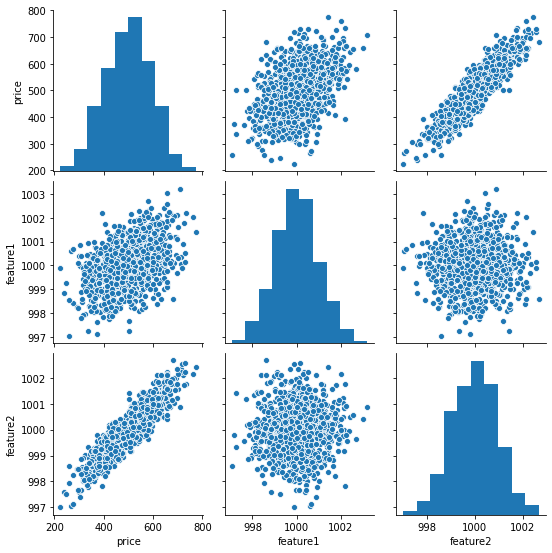

In [6]:
sns.pairplot(df)

### Test/Train Split

In [7]:
from sklearn.model_selection import train_test_split

In [8]:

X = df[['feature1','feature2']].values

y = df['price'].values


X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [9]:
X_train.shape

(700, 2)

In [10]:
X_test.shape

(300, 2)

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
help(MinMaxScaler)

In [15]:
scaler = MinMaxScaler()

In [16]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [17]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
import tensorflow as tf

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [23]:
model = Sequential()

model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(4,activation='relu'))
model.add(Dense(1))
model.compile(optimizer='rmsprop',loss='mse')

In [24]:
model.fit(X_train,y_train,epochs=250)

Epoch 1/250
22/22 [==============================] - 0s 1ms/step - loss: 256710.0312
Epoch 2/250
22/22 [==============================] - 0s 1ms/step - loss: 256655.9844
Epoch 3/250
22/22 [==============================] - 0s 1ms/step - loss: 256600.6094
Epoch 4/250
22/22 [==============================] - 0s 1ms/step - loss: 256536.2344
Epoch 5/250
22/22 [==============================] - 0s 1ms/step - loss: 256459.5469
Epoch 6/250
22/22 [==============================] - 0s 974us/step - loss: 256369.6875
Epoch 7/250
22/22 [==============================] - 0s 922us/step - loss: 256264.3906
Epoch 8/250
22/22 [==============================] - 0s 1ms/step - loss: 256143.1094
Epoch 9/250
22/22 [==============================] - 0s 1ms/step - loss: 256003.0156
Epoch 10/250
22/22 [==============================] - 0s 1ms/step - loss: 255842.2344
Epoch 11/250
22/22 [==============================] - 0s 1ms/step - loss: 255660.9375
Epoch 12/250
22/22 [==============================] - 0s 1m

In [25]:
model.history.history

{'loss': [256710.03125,
  256655.984375,
  256600.609375,
  256536.234375,
  256459.546875,
  256369.6875,
  256264.390625,
  256143.109375,
  256003.015625,
  255842.234375,
  255660.9375,
  255455.515625,
  255226.3125,
  254968.984375,
  254681.296875,
  254362.515625,
  254015.171875,
  253628.1875,
  253204.0625,
  252741.078125,
  252235.890625,
  251686.859375,
  251091.296875,
  250445.375,
  249747.515625,
  248997.8125,
  248185.96875,
  247316.6875,
  246388.15625,
  245392.296875,
  244330.21875,
  243199.421875,
  241998.765625,
  240720.453125,
  239363.15625,
  237922.171875,
  236406.96875,
  234796.75,
  233103.203125,
  231310.078125,
  229433.171875,
  227465.1875,
  225400.40625,
  223209.484375,
  220937.6875,
  218556.703125,
  216079.453125,
  213480.78125,
  210775.796875,
  207952.234375,
  205041.25,
  201999.953125,
  198838.234375,
  195568.78125,
  192180.703125,
  188660.09375,
  185038.359375,
  181302.953125,
  177451.46875,
  173491.0,
  169418.046875,


In [26]:
loss = model.history.history['loss']

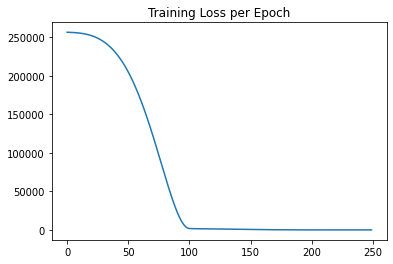

In [27]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Training Loss per Epoch");

In [29]:
training_score = model.evaluate(X_train,y_train,verbose=0)
test_score = model.evaluate(X_test,y_test,verbose=0)

In [30]:
training_score

23.72041893005371

In [31]:
test_score

25.164400100708008

In [32]:
test_predictions = model.predict(X_test)

In [33]:
test_predictions

array([[405.5487 ],
       [623.98413],
       [592.54443],
       [572.6388 ],
       [366.86514],
       [579.5895 ],
       [515.4268 ],
       [459.40366],
       [549.63794],
       [447.80417],
       [612.21985],
       [549.3046 ],
       [419.37238],
       [409.13715],
       [651.6867 ],
       [437.57922],
       [508.78052],
       [660.4264 ],
       [663.06964],
       [565.92395],
       [334.43784],
       [445.12796],
       [382.77472],
       [378.99054],
       [566.9931 ],
       [611.0377 ],
       [532.7614 ],
       [428.13654],
       [655.92957],
       [414.33936],
       [442.91852],
       [485.45496],
       [438.7001 ],
       [682.35297],
       [425.01895],
       [417.96542],
       [502.24484],
       [550.85626],
       [510.09888],
       [395.6293 ],
       [619.0269 ],
       [416.89075],
       [604.874  ],
       [446.23795],
       [502.33105],
       [582.1008 ],
       [669.4667 ],
       [490.72583],
       [318.7543 ],
       [485.7569 ],


In [34]:
pred_df = pd.DataFrame(y_test,columns=['Test Y'])

In [35]:
pred_df

,Test Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [36]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [37]:
test_predictions

0      405.548706
1      623.984131
2      592.544434
3      572.638794
4      366.865143
          ...    
295    529.419189
296    515.720642
297    610.081787
298    417.213348
299    411.148132
Length: 300, dtype: float32

In [38]:
pred_df = pd.concat([pred_df,test_predictions],axis=1)

In [39]:
pred_df.columns = ['Test Y','Model Predictions']

In [40]:
pred_df

,Test Y,Model Predictions
0,402.296319,405.548706
1,624.156198,623.984131
2,582.455066,592.544434
3,578.588606,572.638794
4,371.224104,366.865143
...,...,...
295,525.704657,529.419189
296,502.909473,515.720642
297,612.727910,610.081787
298,417.569725,417.213348


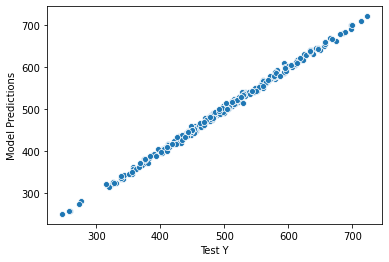

In [41]:
sns.scatterplot(x='Test Y',y='Model Predictions',data=pred_df)

In [42]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [43]:
mean_absolute_error(pred_df['Test Y'],pred_df['Model Predictions'])

4.024909605946253

In [44]:
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])

25.164400876695094

In [46]:
#RMSE
mean_squared_error(pred_df['Test Y'],pred_df['Model Predictions'])**0.5

5.016413148525059

In [47]:
# [[Feature1, Feature2]]
new_gem = [[998,1000]]

In [48]:
# Don't forget to scale!
scaler.transform(new_gem)

array([[0.14117652, 0.53968792]])

In [49]:
new_gem = scaler.transform(new_gem)

In [50]:
model.predict(new_gem)

array([[419.97873]], dtype=float32)

## Saving and Loading a Model

In [51]:
from tensorflow.keras.models import load_model

In [53]:
model.save('keras basic regression model.h5') 

In [58]:
from google.colab import files
files.download('keras basic regression model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [55]:
later_model = load_model('keras basic regression model.h5')

In [56]:
later_model.predict(new_gem)

array([[419.97873]], dtype=float32)